### Project description:
1. In this project, a simple database containing 17 Boolean-valued attributes. The "type" attribute appears to be the class attribute. 
2. The goal of this project is to group the animals for better allocation plans, zoo services and other resources.
3. The dataset can be found on the UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Zoo].

### Structure
#### 1. Data description: 
        > there're 101 animals with 16 features, the values are boolean, that is, 0 and 1.
#### 2. Data visulization: 
        > Using Heatmap  to have a first view of the correlation of features
#### 3. K-means Clustering: 
        > Elbow method chooses the optimal number of cluster
        > Before visualizing the clustering results, we need to use PCA to reduce the dimension, there're 3-D left 
#### 4. Clustering-results Visualization: 
        > 3-D scatter plot
        > 3-D heatmap
        > Get conclusion

### Data description

In [1]:
import pandas as pd
zoo_data = pd.read_csv('zoo_data.csv', encoding = 'utf-8', index_col = ["animal_name"])
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal_name,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [2]:
zoo_data.shape

(101, 16)

### Data visualization

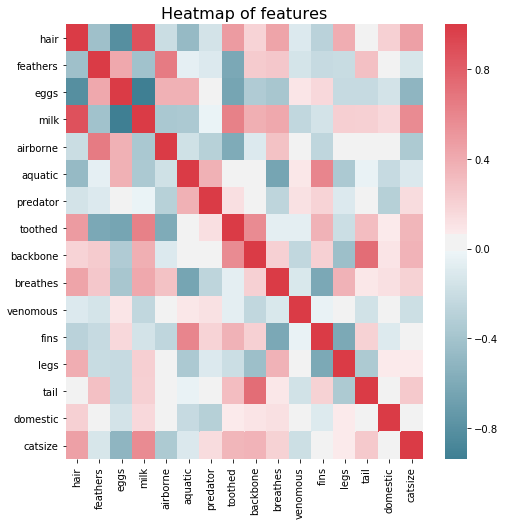

In [9]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))
plt.title("Heatmap of features",fontsize=16)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(zoo_data.corr(), cmap=cmap)
plt.show()

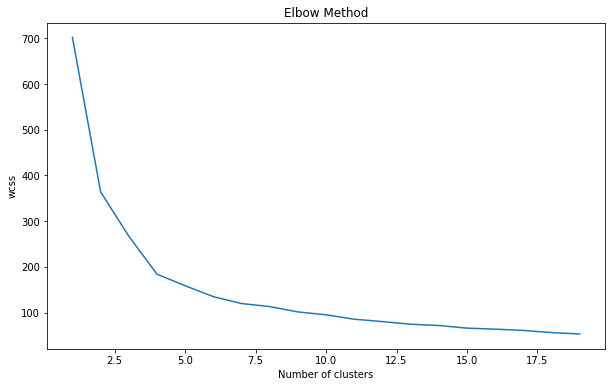

In [10]:

#Elbow method finds the number of clusters
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,20):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(zoo_data)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [5]:
#clusters = 7
kmeans = KMeans(n_clusters = 7) 
kmeans.fit(zoo_data) 
print(kmeans.inertia_)

119.70392382759556


> To visualize the clustering, PCA is needed

In [6]:
#PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(zoo_data) 
  
pca_data = pd.DataFrame(pca.transform(zoo_data)) 
  
print(pca_data.head())

         0         1         2         3         4         5         6   \
0  1.351029 -1.058533  0.314103 -0.047443  0.722134 -0.072568  0.193098   
1  1.306634 -1.208344 -0.289405  0.118024 -0.218509 -0.285344 -0.189077   
2 -3.131655  0.252200  0.929419  0.081724 -0.389771  0.266292 -0.008563   
3  1.351029 -1.058533  0.314103 -0.047443  0.722134 -0.072568  0.193098   
4  1.277296 -1.225750  0.126239 -0.442241  0.218647  0.125204 -0.096934   

         7         8         9         10        11        12        13  \
0 -0.002636  0.262649  0.032626 -0.306364 -0.162001 -0.285715  0.227764   
1 -0.315514 -0.075927  0.085436  0.103501 -0.078657 -0.056437 -0.006456   
2 -0.021667 -0.105519 -0.262896 -0.178128 -0.020310  0.055519  0.089507   
3 -0.002636  0.262649  0.032626 -0.306364 -0.162001 -0.285715  0.227764   
4 -0.043568 -0.127643 -0.099016 -0.065040 -0.055064  0.002662 -0.027185   

         14        15  
0  0.057464  0.048196  
1 -0.003654 -0.031995  
2 -0.006134  0.015993  
3 

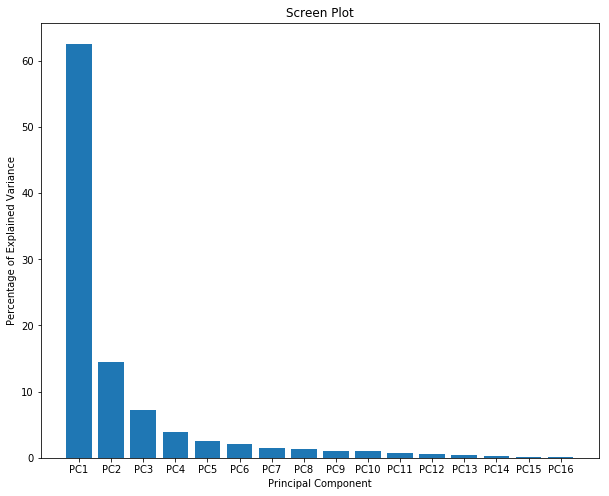

In [7]:
#draw Screen plot
import numpy as np
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10,8))
plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel("Principal Component")
plt.title('Screen Plot')
plt.show()

> The first 3 PC account for about 82% of variation, so, we use 3-dimensions

In [8]:
pca = PCA(3) 
pca.fit(zoo_data) 
  
pca_data = pd.DataFrame(pca.transform(zoo_data)) 

In [12]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/7) 
cluster_colors = colors[5 : -5 : skips] 

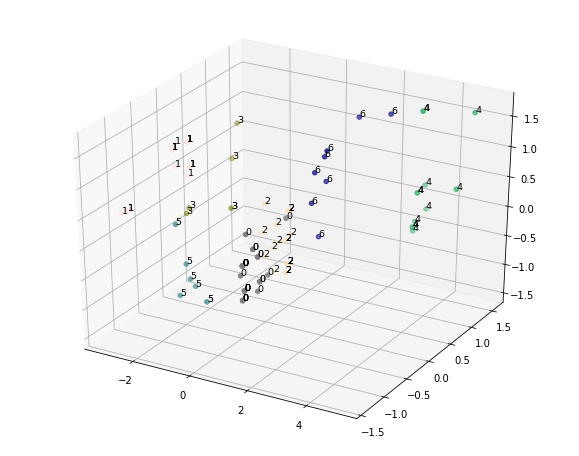

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(10,8)) 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label,size = 9.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 

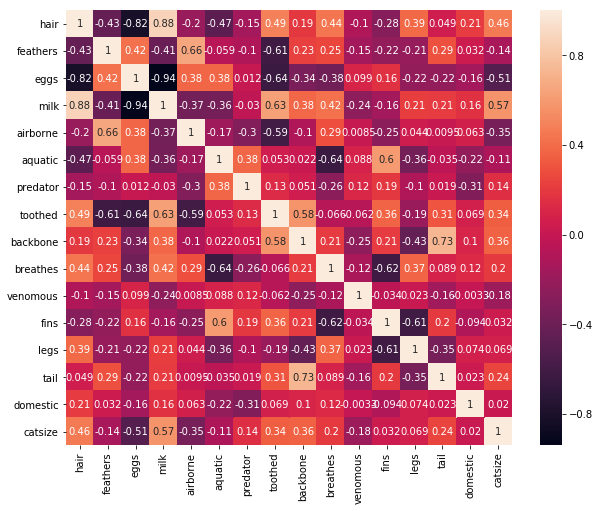

In [14]:
import seaborn as sns 
  
# generating correlation heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(zoo_data.corr(), annot = True) 
  
# posting correlation heatmap to output console 

plt.show() 

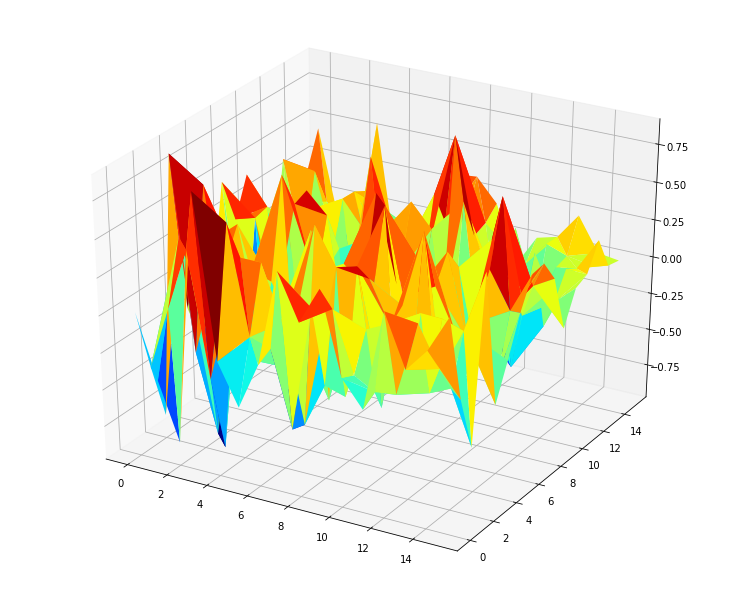

In [15]:
from matplotlib import cm 
  
# generating correlation data 
df = zoo_data.corr() 
df.index = range(0, len(df)) 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
df = df.astype(object) 
  
''' Generating coordinates with  
corresponding correlation values '''
for i in range(0, len(df)): 
    for j in range(0, len(df)): 
        if i != j: 
            df.iloc[i, j] = (i, j, df.iloc[i, j]) 
        else : 
            df.iloc[i, j] = (i, j, 0) 
  
df_list = [] 
  
# flattening dataframe values 
for sub_list in df.values: 
    df_list.extend(sub_list) 
  
# converting list of tuples into trivariate dataframe 
plot_df = pd.DataFrame(df_list) 
  
fig =plt.figure(figsize=(10,8))
ax = Axes3D(fig) 
  
# plotting 3D trisurface plot 
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],  
                    cmap = cm.jet, linewidth = 0.2) 
  
plt.show()

> Using heatmap and trisurface plot, we can make some inferences on how to select a smaller set of features used for performing cluster analysis. Generally, feature pairs with extreme correlation values carry high explanatory power and can be used for further analysis.
In this case, looking at both the plots, we arrive at a rational list of 7 features:[“milk”, “eggs”, “hair”, “toothed”, “feathers”, “breathes”, “aquatic”]

> Running cluster analysis again on the subsetted feature set, we can generate a scatter plot with better inference on how to spread different animals among various groups.

> We observe a reduced overall inertia of 14.479670329670329, which is indeed a lot less from the initial inertia.